In [165]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def dx_dt(x, t):
    return [m1*x[1], -b1*x[1] - k1*x[0] - Fo*np.cos(w1*t+fi1)]

In [ ]:
freq = []
ampl = []

In [53]:
print('           Entre com os dados da 1a simulação           ')
print('--------------------------------------------------------')
m1=float(input("Insira o valor da massa em kg:"))
b1=float(input("Insira o valor da constante de amortecimento em kg/s:"))
k1=float(input("Insira o valor da constante elástica em N/m:"))
Fo=float(input("Insira o valor da intensidade da força externa em N:"))
fi1=float(input("Insira o valor da fase inicial em rad:"))
print('--------------------------------------------------------')
pos=float(input("Insira a posição inicial em m:"))
x0 = [pos, 0]


           Entre com os dados da 1a simulação           
--------------------------------------------------------
Insira o valor da massa em kg:1
Insira o valor da constante de amortecimento em kg/s:.5
Insira o valor da constante elástica em N/m:5
Insira o valor da intensidade da força externa em N:5
Insira o valor da fase inicial em rad:0
--------------------------------------------------------
Insira a posição inicial em m:1


A cada gráfico gerado, meça a amplitude do estado estacionário, entre com o valor na célula seguinte e retorne para entrar com um novo valor da frequência da força externa $\omega_{e}$

In [182]:
w1=float(input("Insira o valor da frequência angular externa em rad/s:"))

Insira o valor da frequência angular externa em rad/s:3


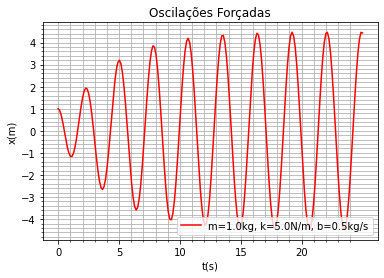

In [180]:
ts = np.linspace(0, 25, 200)
xs = odeint(dx_dt, x0, ts)
ys = xs[:,0]

major_ticks_x = np.arange(0, 25, 5)
minor_ticks_x = np.arange(0, 25, 1)
major_ticks_y = np.arange(-5, 5, 1)
minor_ticks_y = np.arange(-5, 5, .2)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(major_ticks_x)
ax.set_yticks(major_ticks_y)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(minor_ticks_y, minor=True)
ax.grid(which='both')

#Aqui você pode alterar o nome do eixo horizontal do gráfico
plt.xlabel("t(s)")

#Aqui você pode alterar o nome do eixo vertical do gráfico
plt.ylabel("x(m)")

#Aqui você pode alterar o título do gráfico
plt.title("Oscilações Forçadas")

#Aqui você pode desativar o grid do gráfico digitando False no lugar de True
plt.grid(True)

plt.plot(ts,ys,color='red',linewidth=1.5,label='m=%.1fkg, k=%.1fN/m, b=%.1fkg/s' %(m1,k1,b1));
plt.legend(loc=4)
plt.show()

In [183]:
xm=float(input("entre com o valor da amplitude = " ))
freq.append(w1)
ampl.append(xm)

entre com o valor da amplitude = .5


A partir da segunda medida você pode rodar o código abaixo e verificar como a curva de ressonância está se formando. Isso vai ajudá-la a escolher novos valores da simulação.

<function matplotlib.pyplot.show>

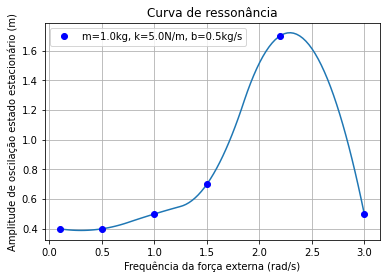

In [195]:
plt.xlabel("Frequência da força externa (rad/s)")

plt.ylabel("Amplitude de oscilação estado estacionário (m)")

plt.title("Curva de ressonância")

plt.grid(True)

#plota uma curva média junto com os dados
xnew = np.linspace(min(freq), max(freq), 100)
smot = make_interp_spline(freq, ampl, k=2) # k = ordem do smooth
ynew = smot(xnew)
plt.plot(xnew, ynew)
###

plt.plot(freq,ampl,'bo',label='m=%.1fkg, k=%.1fN/m, b=%.1fkg/s' %(m1,k1,b1))

plt.legend(loc=0)

plt.show

In [194]:
print ("frequência =", freq)
print ("amplitude =", ampl)


frequência = [0.1, 0.5, 1.0, 1.5, 2.2, 3.0]
amplitude = [0.4, 0.4, 0.5, 0.7, 1.7, 0.5]
